# <center> Kmeans Clustering </center>
<center>Using Mall Customers Data</center>

<img src="../../../_resources/images/kmeans.jpg" width="300">

### Packages Used

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

### Load and Preprocess Data

In [25]:
# Importing the dataset
dataset = pd.read_csv('../../../_resources/data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


### Create Kmeans Class With all Methods

In [43]:
class Kmeans:
    
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        self.centroid = np.array([0,0])
        if self.seed is not None:
            np.random.seed(self.seed())
        self.max_iter = max_iter
    
    def initialise_centroids(self, data):
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]
        return self.centroids
    
    def assign_clusters(self, data):
        if data.ndim == 1:
            data = data.reshape(-1,1)
        dist_to_centroid = sk.metrics.pairwise_distances(data, self.centroids,
                                             metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        return self.cluster_labels
    
    def update_centroids(self, data):
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) 
                                   for i in range(self.k)])
        return self.centroids
    
    
    def predict(self, data):
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        self.centroids = self.initialize_centroids(data)
        for iter in range(self.max_iter):
            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)
            if iter % 100 == 0:
                print('Running Model Iteration %d' %iter)
        print('Model finished running')
        return self
    

    

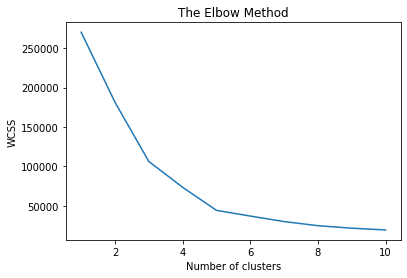

In [44]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [45]:
# Fitting K-Means to the dataset
kmeans = Kmeans(k = 5)
y_kmeans = kmeans.predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

AttributeError: 'Kmeans' object has no attribute 'centroids'